In [1]:
!pip install tflearn
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected , flatten
from tflearn.layers.estimator import regression 
import tensorflow as tf 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import csv
from random import shuffle 
from google.colab import drive
drive.mount('/content/drive')

trainingSet = np.load('/content/drive/MyDrive/NaturalSceneRecognition/train_data(RGB)).npy',allow_pickle=True)
testingSet = np.load('/content/drive/MyDrive/NaturalSceneRecognition/test_data(RGB).npy',allow_pickle=True)


     |████████████████████████████████| 112kB 11.0MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp36-none-any.whl size=127301 sha256=36934b947a2467388ba9ed52b1ff14232ae6a4cb50ab6ad936c129368821cc3b
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn
Instructions for updating:
non-resource variables are not supported in the long term
Mounted at /content/drive


In [2]:
# X = np.array([i[0] for i in trainSet])
# Y = [i[1] for i in trainSet]

train = np.array(trainingSet[:-5000]) 
test = np.array(trainingSet[-5000:]) 
# X = np.array([i[0] for i in train]).reshape(-1, 150, 150,3) 
# Y = [i[1] for i in train] 
# test_x = np.array([i[0] for i in test]).reshape(-1, 150, 150, 3) 
# test_y = [i[1] for i in test]


In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 
trainSet = []
# for img in trainingSet:
#   x = img[0] 
#   # Reshaping the input image 
#   x = x.reshape((1, ) + x.shape)  
#   trainSet.append([x, img[1]])
# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 
datagen = ImageDataGenerator( 
        # rotation_range = 40
        # shear_range = 0.2, 
        # zoom_range = 0.5 
        # horizontal_flip = True,
        brightness_range = (0.5, 1.5)
        ) 

# Loading a sample image  
# img = load_img('/content/drive/MyDrive/ScenesTrainingSet/glacier/10003.jpg')  
# # Converting the input sample image to an array 
# x = trainingSet[0][0] 
count = 0
for img in train:
  count += 1
  print(count)
  x = img[0]
  # print(x)
  # Reshaping the input image 
  x = x.reshape((1, ) + x.shape)  
  # trainSet.append([x, img[1]])  
  # Generating and saving 5 augmented samples  
  # using the above defined parameters.  
  i = 0
  for batch in datagen.flow(x, batch_size = 1, 
                            # save_to_dir ='/content/drive/MyDrive/ScenesTrainingSet',  
                            # save_prefix ='image', save_format ='jpeg'
                            ):
    
    trainSet.append([batch, img[1]])
    i += 1
    if i > 1:     
      break

Streaming output truncated to the last 5000 lines.
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281

In [4]:
len(trainSet)

18182

In [5]:
del trainingSet

In [6]:
train = np.array([i[0] for i in trainSet]).reshape(-1, 150, 150,3) 
trainSet = [i[1] for i in trainSet] 
test_x = np.array([i[0] for i in test]).reshape(-1, 150, 150, 3) 
test_y = [i[1] for i in test]

In [7]:
convnet = input_data(shape =[None, 150, 150, 3], name ='input') 
  
convnet = conv_2d(convnet, 64, 3, activation ='relu') 
convnet = conv_2d(convnet, 64, 3, activation ='relu')
convnet = conv_2d(convnet, 64, 3, activation ='relu') 
convnet = avg_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 1024, 6, activation ='relu') 
convnet = avg_pool_2d(convnet, 6) 

convnet = dropout(convnet, 0.25) 

convnet = conv_2d(convnet, 1024, 6, activation ='relu') 
convnet = avg_pool_2d(convnet, 6) 
convnet = dropout(convnet, 0.25)  
convnet = conv_2d(convnet, 32, 3, activation ='relu')
convnet = conv_2d(convnet, 32, 3, activation ='relu') 
convnet = conv_2d(convnet, 32, 3, activation ='relu') 
convnet = avg_pool_2d(convnet, 5)
convent = flatten(convnet)
convnet = fully_connected(convnet, 128, activation ='relu')
convnet = fully_connected(convnet, 256, activation ='relu')
convnet = fully_connected(convnet, 6, activation ='softmax')

convnet = regression(convnet, optimizer ='adam', learning_rate = 1e-3, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(convnet, tensorboard_dir ='log')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.fit({'input': train}, {'targets':trainSet},
          n_epoch = 25,  
          validation_set =({'input': test_x}, {'targets': test_y}),
          batch_size = 64,  
          snapshot_step = 100,
          show_metric = True,
          run_id = '[NSR]CNN')

Training Step: 7124  | total loss: 0.23635 | time: 170.819s
| Adam | epoch: 025 | loss: 0.23635 - acc: 0.9368 -- iter: 18176/18182
Training Step: 7125  | total loss: 0.22441 | time: 182.091s
| Adam | epoch: 025 | loss: 0.22441 - acc: 0.9400 | val_loss: 0.36002 - val_acc: 0.8962 -- iter: 18182/18182
--


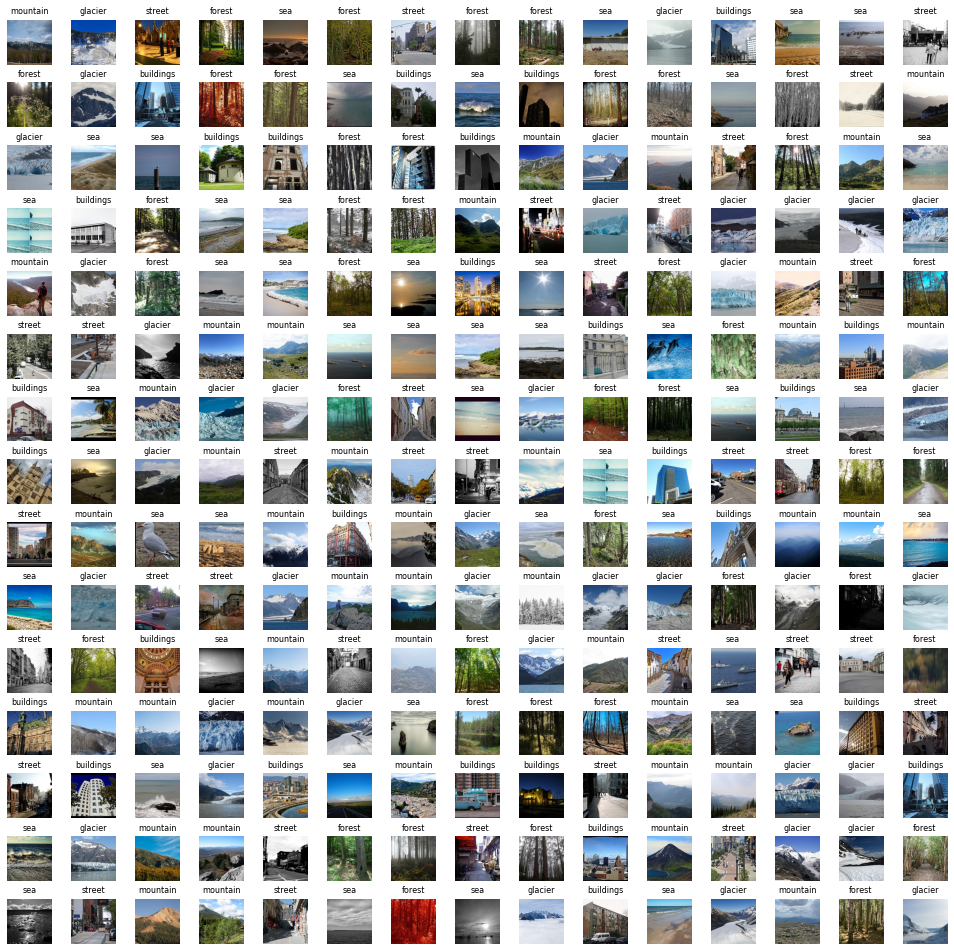

In [11]:
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(testingSet) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    img = testingSet[index][1].reshape((150,150,3))
    prediction = model.predict([img])[0]
    if np.argmax(prediction) == 0: str_label ='buildings'
    elif np.argmax(prediction) == 1: str_label ='forest'
    elif np.argmax(prediction) == 2: str_label ='glacier'
    elif np.argmax(prediction) == 3: str_label ='mountain'
    elif np.argmax(prediction) == 4: str_label ='sea'
    elif np.argmax(prediction) == 5: str_label ='street'
    # with open('[CNN Test]Results.csv', mode='a') as IMG:
    #   IMG_ = csv.writer(IMG, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    #   IMG_.writerow([image,np.argmax(prediction),str_label])
    # print(image, " => ", str_label)
    axes[i].imshow( testingSet[index][1])

    axes[i].set_title(str_label, fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
# buildings 0
# forest 1
# glacier 2
# mountain 3
# sea 4
# street 5

In [12]:
import csv
for image in testingSet:
  img = image[1].reshape((150,150,3))
  prediction = model.predict([img])[0]
  with open('Result30.csv', mode='a') as IMG:
    IMG_ = csv.writer(IMG, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    IMG_.writerow([image[0],np.argmax(prediction)])
  print(image[0], " => ", np.argmax(prediction))

22637.jpg  =>  0
23446.jpg  =>  0
20140.jpg  =>  0
23247.jpg  =>  4
24057.jpg  =>  2
22291.jpg  =>  5
20292.jpg  =>  2
23739.jpg  =>  2
23818.jpg  =>  1
20544.jpg  =>  1
21400.jpg  =>  5
21185.jpg  =>  5
23798.jpg  =>  1
20088.jpg  =>  5
24209.jpg  =>  4
22586.jpg  =>  0
23499.jpg  =>  1
21729.jpg  =>  4
20416.jpg  =>  5
22483.jpg  =>  3
22995.jpg  =>  0
21950.jpg  =>  2
21317.jpg  =>  1
21259.jpg  =>  4
23899.jpg  =>  2
20275.jpg  =>  2
20083.jpg  =>  0
23606.jpg  =>  2
20620.jpg  =>  1
21100.jpg  =>  5
24294.jpg  =>  2
22093.jpg  =>  1
24263.jpg  =>  3
23935.jpg  =>  5
22862.jpg  =>  1
22538.jpg  =>  1
21298.jpg  =>  0
20821.jpg  =>  2
21722.jpg  =>  5
20735.jpg  =>  4
21380.jpg  =>  5
20394.jpg  =>  0
22398.jpg  =>  3
23698.jpg  =>  1
22260.jpg  =>  1
24163.jpg  =>  4
22034.jpg  =>  4
21892.jpg  =>  5
22908.jpg  =>  3
20288.jpg  =>  1
23148.jpg  =>  1
20477.jpg  =>  2
22246.jpg  =>  4
23094.jpg  =>  1
21771.jpg  =>  2
22998.jpg  =>  2
20417.jpg  =>  5
20245.jpg  =>  0
20580.jpg  => 

In [12]:
model.save('[NSR]CNN.tfl')

INFO:tensorflow:/content/[NSR]CNN.tfl is not in all_model_checkpoint_paths. Manually adding it.
